# 1. Preparation


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor



In [2]:
# This setting will print out more data for better exploration
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Read in the cleaned and filtered data
file_path = "C:\\Users\\Kadi\\Documents\\2023\Praktiline andmeteadus\\DASS dataset\\filtered_data_newfeatures.csv"
data = pd.read_csv(file_path, delimiter='\t')
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,mean_response_time,std_deviation_dass,education_label,urban_label,gender_label,engnat_label,hand_label,religion_label,orientation_label,race_label,voted_label,married_label,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness,Depression_Score,Anxiety_Score,Stress_Score,Depression_Severity,Anxiety_Severity,Stress_Severity
0,3,28,3890,3,25,2122,1,16,1944,3,8,2044,3,34,2153,3,33,2416,3,10,2818,3,13,2259,1,21,5541,0,38,4441,3,31,2451,3,24,3325,3,14,1416,3,37,5021,3,27,2342,3,39,2480,2,6,2476,3,35,1627,2,17,9050,2,30,7001,0,11,4719,3,20,2984,3,36,1313,3,42,2444,3,1,9880,3,2,4695,3,5,1677,2,4,6723,3,3,5953,1,26,8062,3,12,5560,3,7,3032,1,29,3316,2,40,3563,3,23,5594,3,41,1477,0,18,3885,1,9,5265,3,19,1892,2,22,4228,3,32,1574,3,15,2969,IN,2,19,167,166,1.0,3.0,7.0,1.0,7.0,1.0,7.0,3.0,1.0,7.0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2.0,3.0,2.0,2.0,16,1,1,1.0,12.0,1.0,10,2.0,1.0,2.0,NaN,3752.904762,0.964227,High school,Urban,Female,No,Right,Other,Heterosexual,Asian,No,Never married,1.0,5.0,5.0,1.0,7.0,27,34,40,Severe,Extremely Severe,Extremely Severe
1,3,2,8118,0,36,2890,1,35,4777,2,28,3090,3,10,5078,3,40,2790,2,18,3408,3,1,8342,2,37,916,1,32,1537,1,21,3926,1,25,3691,3,26,2004,3,4,8888,2,27,4109,2,19,4058,3,12,3692,1,6,3373,0,23,6015,0,16,3023,1,22,2670,2,3,5727,0,39,3641,1,33,2670,1,7,7649,2,11,2537,2,5,2907,3,9,1685,2,41,4726,2,17,6063,1,20,3307,2,14,4995,2,38,2505,1,34,2540,1,31,4359,2,15,3925,3,13,4609,1,30,3755,1,42,2323,0,24,5713,1,8,1334,1,29,5562,US,2,1,193,186,6.0,3.0,4.0,1.0,5.0,4.0,7.0,1.0,1.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,3.0,2.0,1.0,16,2,1,2.0,7.0,NaN,70,2.0,1.0,4.0,NaN,4022.071429,0.961513,High school,Urban,Female,Yes,Left,Christian (Other),NaN,Other,No,Never married,5.0,5.0,2.5,1.0,4.0,24,17,27,Severe,Severe,Severe
2,2,7,5784,0,33,4373,3,41,3242,0,13,6470,3,11,3927,2,9,3704,0,17,4550,2,5,3021,1,32,5864,3,21,3722,1,10,3424,0,36,3236,3,23,2489,0,34,7290,3,12,6587,3,22,3627,3,38,2905,1,18,2998,1,8,10233,0,16,4258,3,28,2888,2,4,59592,1,3,11732,3,2,8834,1,29,7358,0,30,4928,1,15,3036,0,19,4127,1,37,3934,1,26,10782,3,1,8273,2,39,3501,0,27,3824,3,25,2141,2,6,17461,3,24,1557,3,40,4446,3,42,1883,1,35,5790,1,14,4432,0,20,2203,3,31,5768,PL,2,5,271,122,2.0,3.0,2.0,6.0,5.0,2.0,5.0,3.0,3.0,6.0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2.0,3.0,2.0,2.0,17,2,1,1.0,4.0,3.0,60,1.0,1.0,3.0,NaN,6433.190476,1.208756,High school,Urban,Female,No,Right,Christian (Catholic),Homosexual,White,Yes,Never married,2.0,4.0,2.5,4.5,5.5,39,12,17,Extremely Severe,Moderate,Mild
3,1,23,5081,2,11,6837,1,37,5521,0,27,4556,2,28,3269,2,26,3231,3,2,7138,1,19,3079,2,31,9650,2,17,4179,1,5,5928,0,21,2838,0,20,2560,3,29,5139,1,22,3597,1,35,3336,2,10,4506,0,14,2695,0,25,8128,1,15,3125,0,6,4061,0,40,4272,0,12,4029,0,9,5630,0,18,30631,1,24,9870,3,4,2411,0,16,9478,2,1,7618,2,32,12639,2,34,5378,0,41,8923,1,38,2977,3,3,5620,0,7,16760,0,8,6427,1,39,3760,0,13,4112,2,42,2769,3,33,4432,3,30,3643,1,36,3698,US,2,3,261,336,1.0,7.0,7.0,4.0,6.0,4.0,6.0,7.0,6.0,7.0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1.0,3.0,2.0,1.0,13,2,1,2.0,4.0,5.0,70,2.0,1.0,5.0,biology,6036.45

In [3]:
missing_value_counts = data.isnull().sum()
columns_with_missing_values = missing_value_counts[missing_value_counts > 0]
print(columns_with_missing_values)
print(data.shape)

country                    2
TIPI1                    473
TIPI2                    555
TIPI3                    575
TIPI4                    453
TIPI5                    504
TIPI6                    480
TIPI7                    587
TIPI8                    645
TIPI9                    416
TIPI10                   543
education                485
urban                    361
gender                    64
engnat                    50
hand                     166
religion                 343
orientation             3039
voted                    310
married                  192
familysize              1074
major                  10823
education_label          485
urban_label              361
gender_label              64
engnat_label              50
hand_label               166
religion_label           343
orientation_label       3039
voted_label              310
married_label            192
Extraversion             635
Agreeableness            734
Conscientiousness        827
Emotional_Stab

In [4]:
# Define the list of columns to be used in the following analyses
subset_columns = [
    'education', 'age', 'familysize',
    'urban_label', 'gender_label', 'engnat_label', 'hand_label',
    'religion_label', 'orientation_label', 'race_label', 'voted_label',
    'married_label', 'Depression_Score', 'Anxiety_Score', 'Stress_Score',
    'Extraversion', 'Agreeableness', 'Conscientiousness', 'Emotional_Stability', 'Openness'
]

# Alternative with the full list of TIPI items rather than dimensions
subset_columns2 = [
    'education', 'age', 'familysize',
    'urban_label', 'gender_label', 'engnat_label', 'hand_label',
    'religion_label', 'orientation_label', 'race_label', 'voted_label',
    'married_label', 'Depression_Score', 'Anxiety_Score', 'Stress_Score',
    'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9','TIPI10',
]

# Create the subset DataFrame
df_subset = data[subset_columns].copy()

# Display the first few rows of the subset DataFrame to verify it looks as expected

print(df_subset.head())
print(df_subset.columns)


   education  age  familysize urban_label gender_label engnat_label  \
0        2.0   16         2.0       Urban       Female           No   
1        2.0   16         4.0       Urban       Female          Yes   
2        2.0   17         3.0       Urban       Female           No   
3        1.0   13         5.0       Urban       Female          Yes   
4        3.0   19         4.0    Suburban       Female           No   

  hand_label        religion_label orientation_label race_label voted_label  \
0      Right                 Other      Heterosexual      Asian          No   
1       Left     Christian (Other)               NaN      Other          No   
2      Right  Christian (Catholic)        Homosexual      White         Yes   
3       Left  Christian (Catholic)             Other      Other          No   
4       Both                Muslim      Heterosexual      Asian          No   

   married_label  Depression_Score  Anxiety_Score  Stress_Score  Extraversion  \
0  Never married 

In [5]:
df_subset_clean = df_subset.dropna()

missing_value_counts = df_subset_clean.isnull().sum()
columns_with_missing_values = missing_value_counts[missing_value_counts > 0]
columns_with_missing_values

print(columns_with_missing_values)
print(df_subset_clean.shape)

Series([], dtype: int64)
(32129, 20)


In [6]:
# Define categorical and continuous columns (Education was included as a continuous variable to maintain the ordinal scale)
categorical_cols = ['urban_label', 'gender_label', 'engnat_label', 'hand_label',
                    'religion_label', 'orientation_label', 'race_label', 'voted_label', 'married_label']

continuous_cols = ['education','age', 'familysize', 'Extraversion', 'Agreeableness', 'Conscientiousness', 'Emotional_Stability', 'Openness']
#continuous_cols = ['education','age', 'familysize', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']

# Perform one-hot encoding on the categorical variables (in case you leave in NaNs)
#df_subset_encoded = pd.get_dummies(df_subset, columns=categorical_cols, drop_first=True, dummy_na=True)

# Perform one-hot encoding on the categorical variables 
df_subset_encoded = pd.get_dummies(df_subset_clean, columns=categorical_cols, drop_first=True)

# Standardize continuous variables
scaler = StandardScaler()
df_subset_encoded[continuous_cols] = scaler.fit_transform(df_subset_encoded[continuous_cols])

# Check the new columns to ensure they've been one-hot encoded
print(df_subset_encoded.head())
print(df_subset_encoded.columns)


   education       age  familysize  Depression_Score  Anxiety_Score  \
0  -0.658293 -0.884107   -0.861298                27             34   
2  -0.658293 -0.767569   -0.305979                39             12   
3  -1.844512 -1.233723    0.804659                16             17   
4   0.527926 -0.534491    0.249340                32             40   
5  -0.658293 -0.417953    0.249340                13              6   

   Stress_Score  Extraversion  Agreeableness  Conscientiousness  \
0            40     -1.566110       0.368412           0.517435   
2            17     -0.926852      -0.451333          -1.161349   
3            16     -0.607224       1.598029           1.860461   
4            29     -0.607224      -0.451333          -1.161349   
5            12     -1.246481       2.007902           1.188948   

   Emotional_Stability  Openness  urban_label_Suburban  urban_label_Urban  \
0            -1.464149  1.784434                 False               True   
2             0.

# 2. Splitting the data

In [7]:
# Define the features (independent variables) 
X = df_subset_encoded.drop(['Depression_Score', 'Anxiety_Score', 'Stress_Score'], axis=1)

# Define the target variables for each prediction task
y_dep = df_subset_encoded['Depression_Score']  # For predicting Depression Score
y_anx = df_subset_encoded['Anxiety_Score']     # For predicting Anxiety Score
y_str = df_subset_encoded['Stress_Score']      # For predicting Stress Score

# Split the dataset into training (80%) and testing (20%) sets
# For Depression Score prediction
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X, y_dep, test_size=0.2, random_state=42)
# For Anxiety Score prediction
X_train_anx, X_test_anx, y_train_anx, y_test_anx = train_test_split(X, y_anx, test_size=0.2, random_state=42)
# For Stress Score prediction
X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(X, y_str, test_size=0.2, random_state=42)

# Output the result of the split
print(f"Training feature set size: {X_train_dep.shape}")
print(f"Testing feature set size: {X_test_dep.shape}")


Training feature set size: (25703, 39)
Testing feature set size: (6426, 39)


# 3. Running the models

### 1. Ridge regression

#### a) predicting depression scores

In [8]:
# Initialize the Ridge Regression model
ridge_model_d = Ridge(alpha=1.0, random_state=42)

# Train the model using the training data
# For Depression Score
ridge_model_d.fit(X_train_dep, y_train_dep)

# Predict on the test set
y_pred_dep = ridge_model_d.predict(X_test_dep)

# Calculate evaluation metrics for Depression Score
mse_dep = mean_squared_error(y_test_dep, y_pred_dep)
r2_dep = r2_score(y_test_dep, y_pred_dep)

print(f'Depression Score - Ridge Regression - Mean Squared Error (MSE): {mse_dep}')
print(f'Depression Score - Ridge Regression - R-squared (R2): {r2_dep}')


Depression Score - Ridge Regression - Mean Squared Error (MSE): 97.27293888665439
Depression Score - Ridge Regression - R-squared (R2): 0.3493989080812966


Emotional_Stability                      5.082261
married_label_Previously married         3.502696
religion_label_Buddhist                  2.701149
married_label_Never married              2.557421
Extraversion                             2.148360
race_label_White                         2.078441
race_label_Other                         1.906003
race_label_Asian                         1.735310
hand_label_Left                          1.701212
religion_label_Jewish                    1.568063
race_label_Indigenous Australian         1.552073
Conscientiousness                        1.522927
religion_label_Sikh                      1.477217
hand_label_Right                         1.464806
race_label_Black                         1.389176
race_label_Native American               1.370094
religion_label_Muslim                    1.021729
orientation_label_Bisexual               0.917732
religion_label_Christian (Catholic)      0.826189
religion_label_Christian (Other)         0.825650


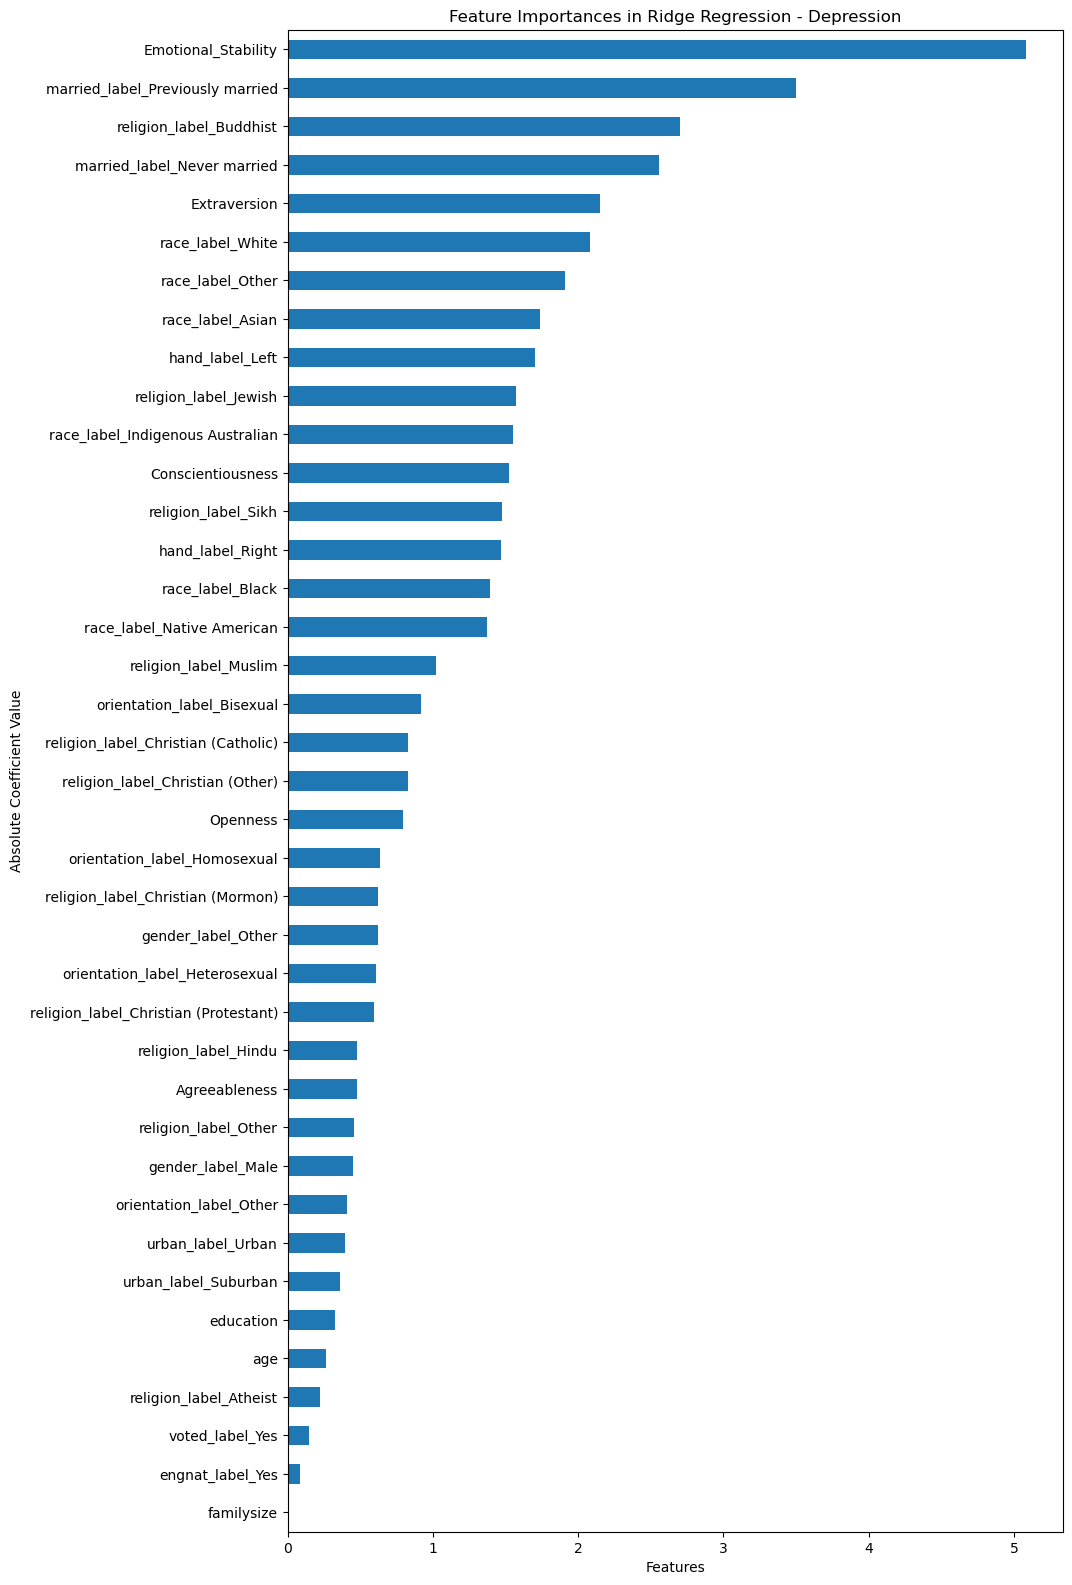

In [9]:
# Trained Ridge model
ridge_coefs = ridge_model_d.coef_

# Create a Series to view the coefficients
coef_series = pd.Series(ridge_coefs, index=X.columns)

# Display the coefficients sorted by their absolute values
coef_series_sorted = coef_series.abs().sort_values(ascending=False)
print(coef_series_sorted)

# Plotting the feature importances
plt.figure(figsize=(10, len(coef_series_sorted) / 2))  
coef_series_sorted.plot(kind='barh')
plt.gca().invert_yaxis() 
plt.title('Feature Importances in Ridge Regression - Depression')
plt.ylabel('Absolute Coefficient Value')
plt.xlabel('Features')
plt.show()

#### b) predicting anxiety scores

In [10]:
# Initialize the Ridge Regression model
ridge_model_a = Ridge(alpha=1.0, random_state=42)

# Train the model using the training data
# For Depression Score
ridge_model_a.fit(X_train_anx, y_train_anx)

# Predict on the test set
y_pred_anx = ridge_model_a.predict(X_test_anx)

# Calculate evaluation metrics for Anxiety Score
mse_anx = mean_squared_error(y_test_anx, y_pred_anx)
r2_anx = r2_score(y_test_anx, y_pred_anx)

print(f'Anxiety Score - Ridge Regression - Mean Squared Error (MSE): {mse_anx}')
print(f'Anxiety Score - Ridge Regression - R-squared (R2): {r2_anx}')


Anxiety Score - Ridge Regression - Mean Squared Error (MSE): 67.280919743016
Anxiety Score - Ridge Regression - R-squared (R2): 0.3331601361982729


Emotional_Stability                      4.714931
race_label_Indigenous Australian         4.062811
hand_label_Left                          2.911623
hand_label_Right                         2.834617
married_label_Previously married         2.433367
religion_label_Christian (Mormon)        1.703027
religion_label_Muslim                    1.678829
religion_label_Other                     1.605670
age                                      1.122162
religion_label_Christian (Other)         1.076206
race_label_Native American               1.020471
orientation_label_Other                  0.959959
religion_label_Sikh                      0.947792
race_label_Black                         0.943484
orientation_label_Bisexual               0.938301
religion_label_Christian (Protestant)    0.935203
religion_label_Christian (Catholic)      0.929971
race_label_White                         0.900187
Extraversion                             0.855993
orientation_label_Heterosexual           0.812676


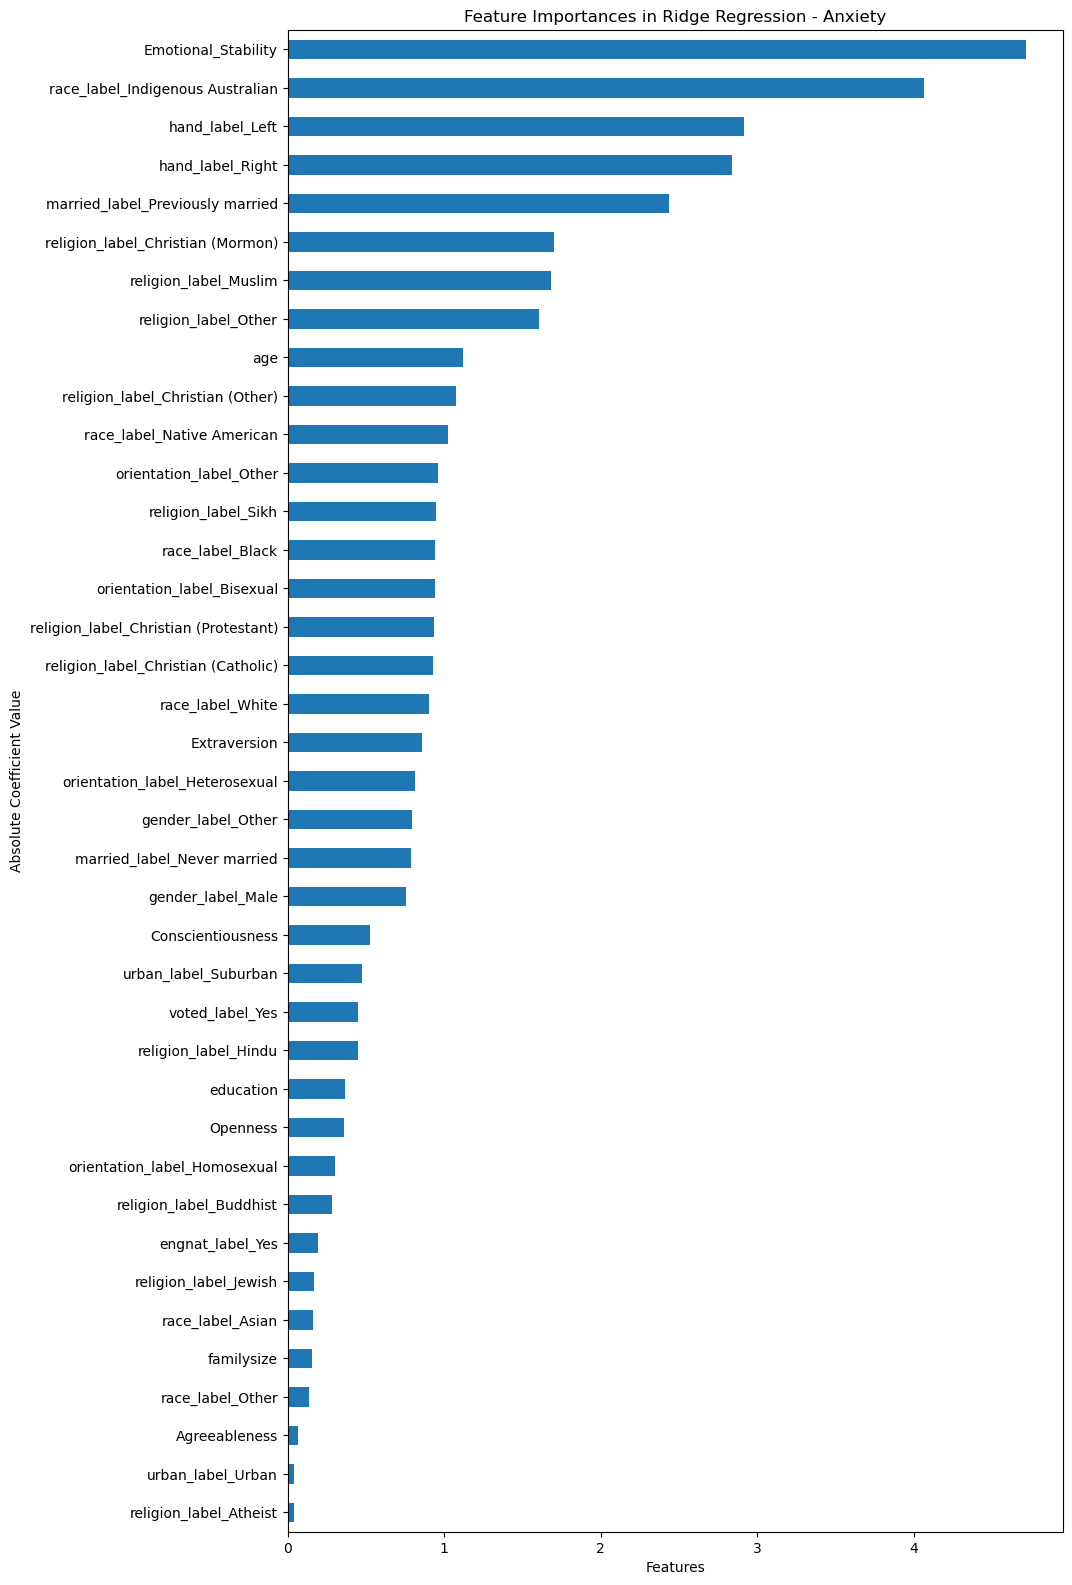

In [11]:
# Trained Ridge model
ridge_coefs = ridge_model_a.coef_

# Create a Series to view the coefficients
coef_series = pd.Series(ridge_coefs, index=X.columns)

# Display the coefficients sorted by their absolute values
coef_series_sorted = coef_series.abs().sort_values(ascending=False)
print(coef_series_sorted)

# Plotting the feature importances
plt.figure(figsize=(10, len(coef_series_sorted) / 2))  
coef_series_sorted.plot(kind='barh')
plt.gca().invert_yaxis() 
plt.title('Feature Importances in Ridge Regression - Anxiety')
plt.ylabel('Absolute Coefficient Value')
plt.xlabel('Features')
plt.show()

#### c) predicting stress scores

In [12]:
# Initialize the Ridge Regression model
ridge_model_s = Ridge(alpha=1.0, random_state=42)

# Train the model using the training data
# For Depression Score
ridge_model_s.fit(X_train_str, y_train_str)

# Predict on the test set
y_pred_str = ridge_model_s.predict(X_test_str)

# Calculate evaluation metrics for Stress Score
mse_str = mean_squared_error(y_test_str, y_pred_str)
r2_str = r2_score(y_test_str, y_pred_str)

print(f'Stress Score - Ridge Regression - Mean Squared Error (MSE): {mse_str}')
print(f'Stress Score - Ridge Regression - R-squared (R2): {r2_str}')


Stress Score - Ridge Regression - Mean Squared Error (MSE): 60.022067043994035
Stress Score - Ridge Regression - R-squared (R2): 0.4365699053583919


Emotional_Stability                      6.168684
religion_label_Christian (Mormon)        2.027919
hand_label_Right                         1.549398
hand_label_Left                          1.444417
married_label_Previously married         1.324167
race_label_White                         1.122774
race_label_Black                         1.012970
orientation_label_Bisexual               1.005807
race_label_Other                         0.960598
race_label_Asian                         0.939156
religion_label_Other                     0.882908
orientation_label_Other                  0.881408
gender_label_Male                        0.861892
religion_label_Christian (Other)         0.851789
religion_label_Hindu                     0.833849
religion_label_Muslim                    0.794164
religion_label_Jewish                    0.786591
race_label_Native American               0.778544
Agreeableness                            0.692835
Extraversion                             0.605119


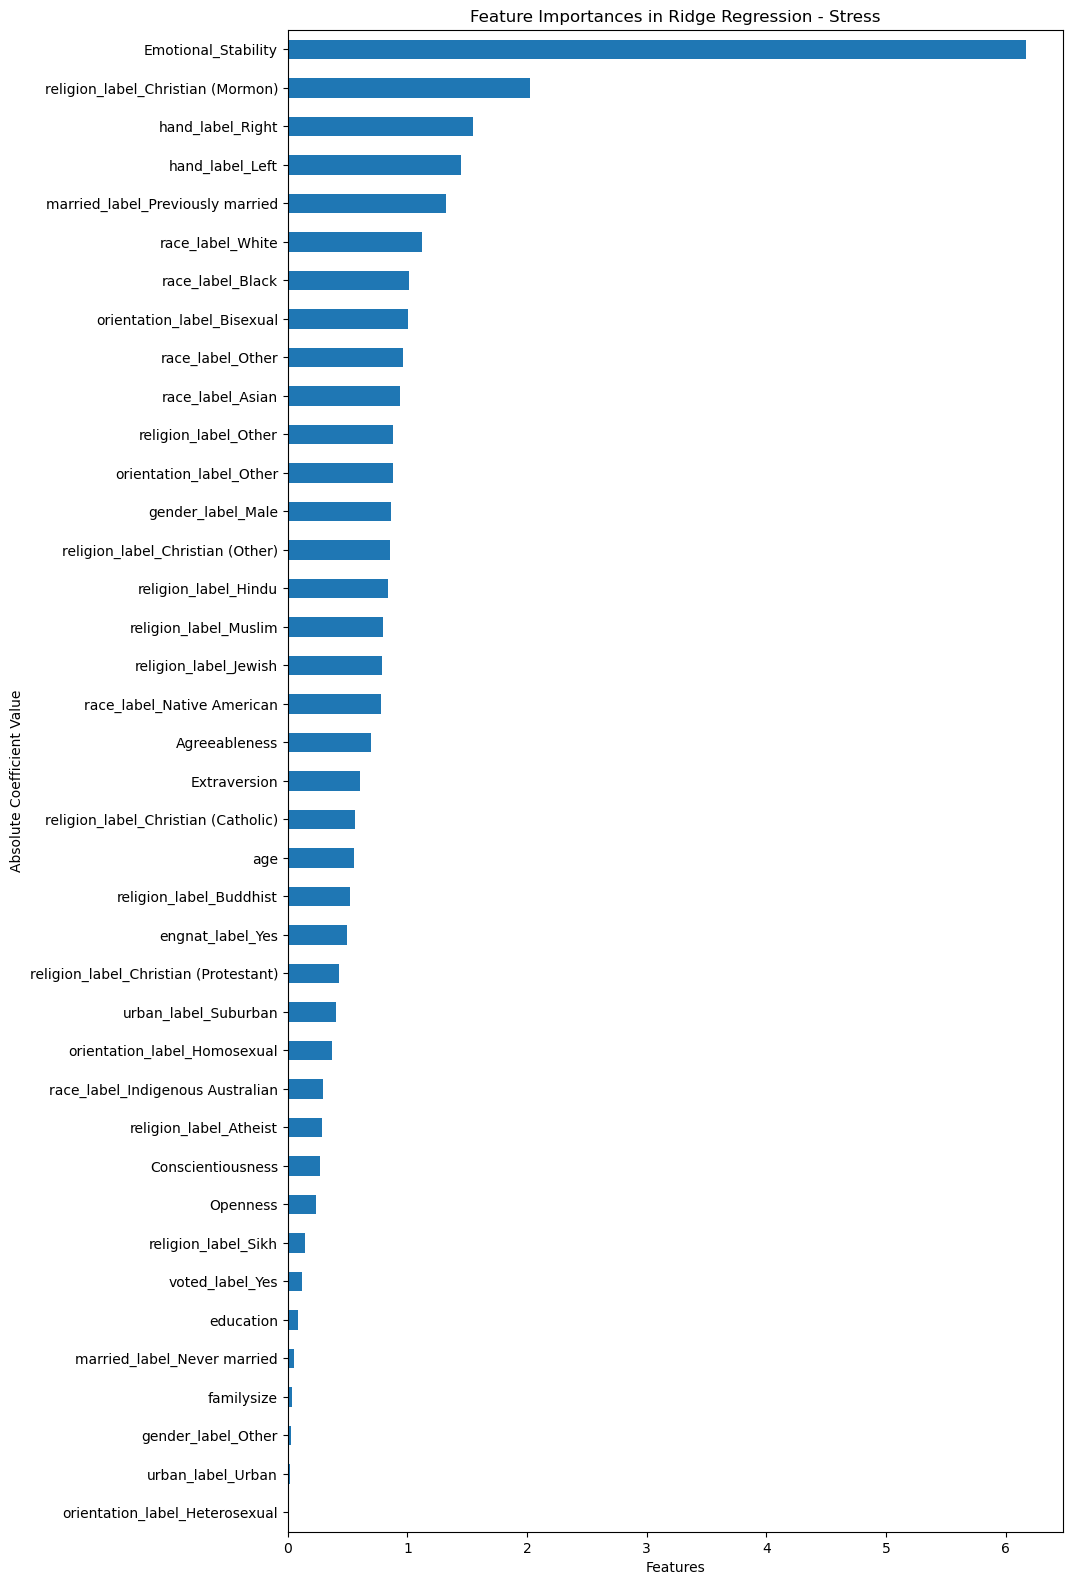

In [13]:
# Trained Ridge model
ridge_coefs = ridge_model_s.coef_

# Create a Series to view the coefficients
coef_series = pd.Series(ridge_coefs, index=X.columns)

# Display the coefficients sorted by their absolute values
coef_series_sorted = coef_series.abs().sort_values(ascending=False)
print(coef_series_sorted)

# Plotting the feature importances
plt.figure(figsize=(10, len(coef_series_sorted) / 2))  
coef_series_sorted.plot(kind='barh')
plt.gca().invert_yaxis() 
plt.title('Feature Importances in Ridge Regression - Stress')
plt.ylabel('Absolute Coefficient Value')
plt.xlabel('Features')
plt.show()

### 2. Random Forest Regressor

#### a) predicting depression scores

In [14]:
# Initialize the Random Forest Regressor
rfr_dep = RandomForestRegressor(random_state=42)

# Train the model on the training set
rfr_dep.fit(X_train_dep, y_train_dep)

# Predict on the test set
y_pred_dep = rfr_dep.predict(X_test_dep)

# Evaluate the model's performance
mse_dep = mean_squared_error(y_test_dep, y_pred_dep)
r2_dep = r2_score(y_test_dep, y_pred_dep)

print(f"Depression Score - Random Forest Regression - Mean Squared Error (MSE): {mse_dep}")
print(f"Depression Score - Random Forest Regression - R-squared (R2): {r2_dep}")


Depression Score - Random Forest Regression - Mean Squared Error (MSE): 101.21614774557558
Depression Score - Random Forest Regression - R-squared (R2): 0.32302511883794915


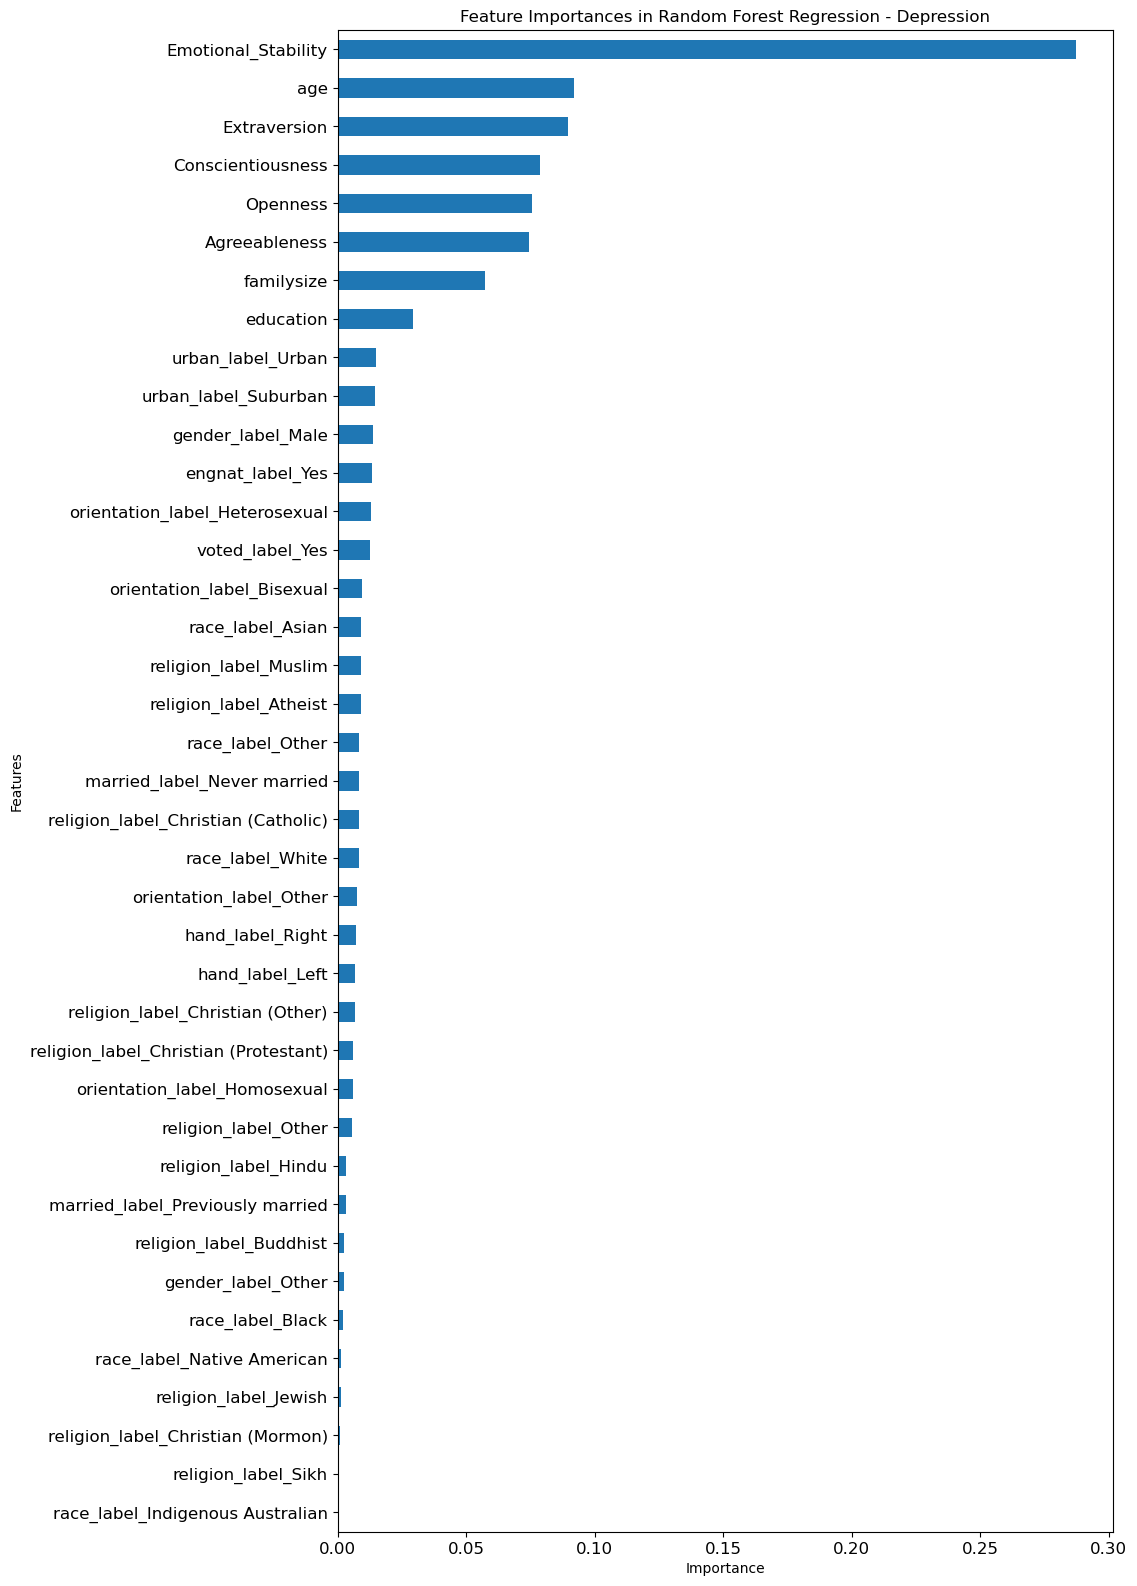

In [15]:
# Get feature importances
importances = rfr_dep.feature_importances_

# Convert the importances into a pandas Series with feature names as the index
features = pd.Series(importances, index=X.columns)

# Sort the feature importances in descending order
sorted_features = features.sort_values(ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, len(sorted_features) / 2))  # Adjust the figure size as needed
sorted_features.plot(kind='barh', fontsize=12)
plt.title('Feature Importances in Random Forest Regression - Depression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


#### b) predicting anxiety scores

In [16]:
# Initialize the Random Forest Regressor
rfr_anx = RandomForestRegressor(random_state=42)

# Train the model on the training set
rfr_anx.fit(X_train_anx, y_train_anx)

# Predict on the test set
y_pred_anx = rfr_anx.predict(X_test_anx)

# Evaluate the model's performance
mse_anx = mean_squared_error(y_test_anx, y_pred_anx)
r2_anx = r2_score(y_test_anx, y_pred_anx)

print(f"Anxiety Score - Random Forest Regression - Mean Squared Error (MSE): {mse_anx}")
print(f"Anxiety Score - Random Forest Regression - R-squared (R2): {r2_anx}")


Anxiety Score - Random Forest Regression - Mean Squared Error (MSE): 69.10271852379655
Anxiety Score - Random Forest Regression - R-squared (R2): 0.31510378299308417


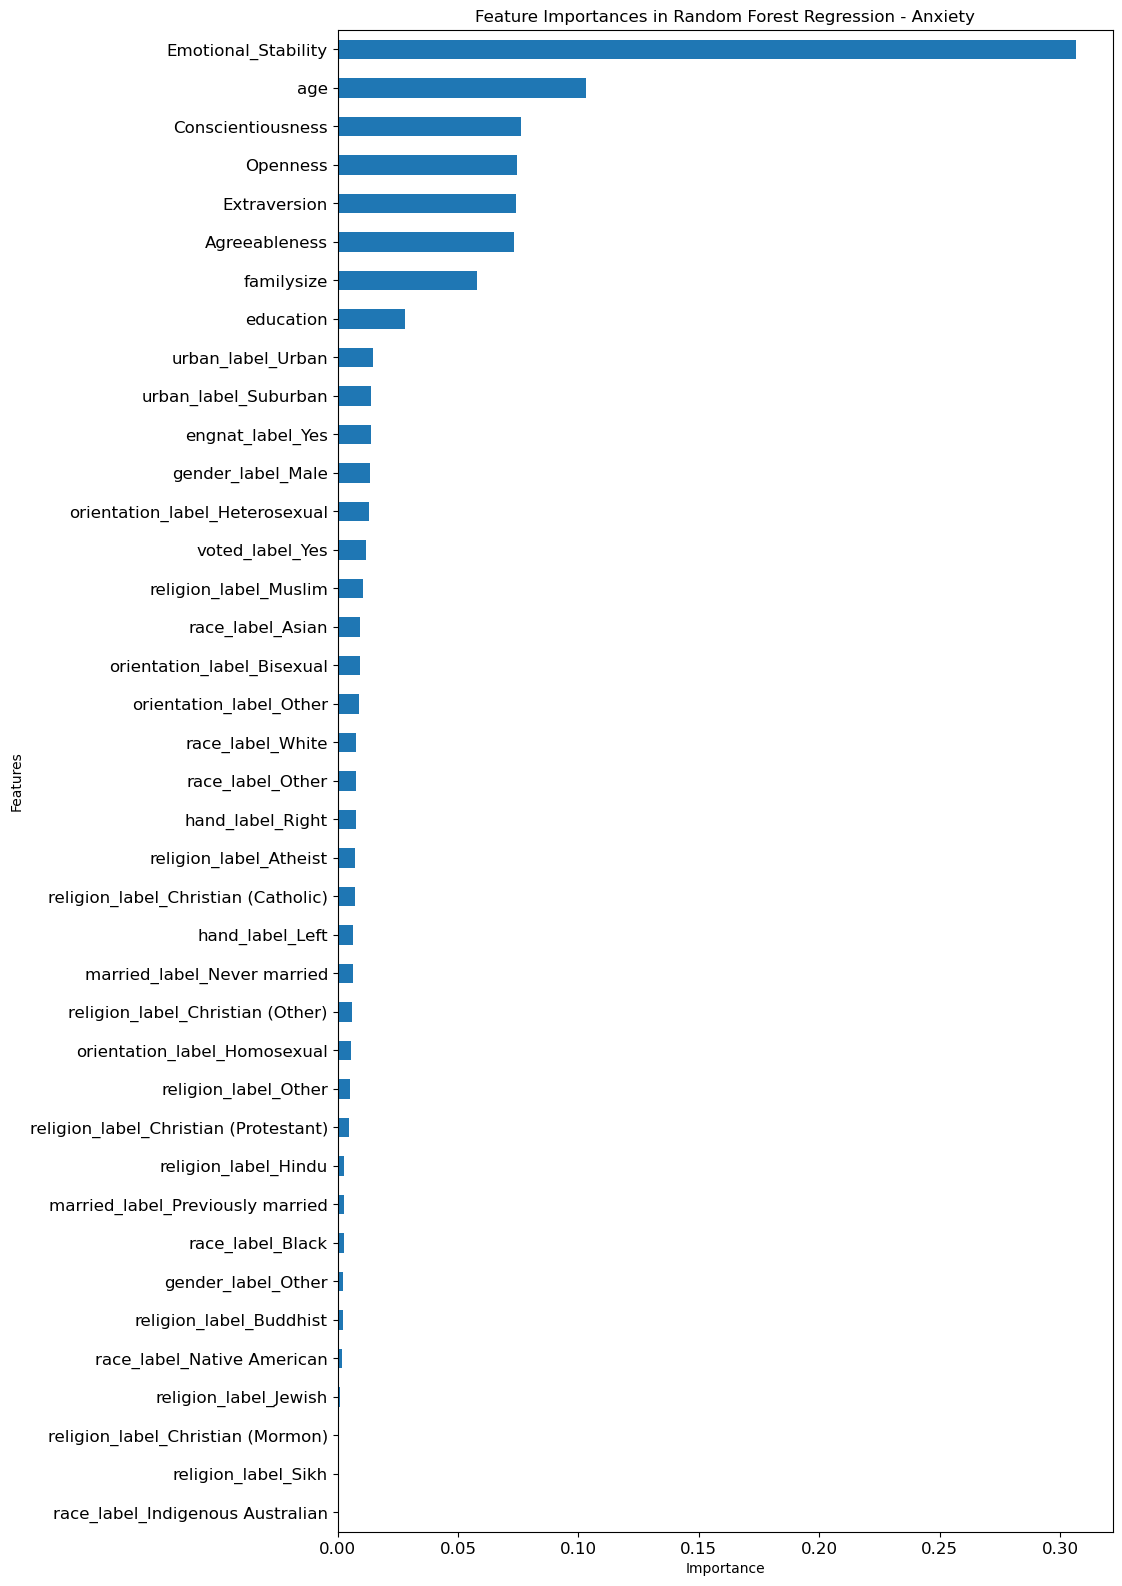

In [17]:
# Get feature importances
importances = rfr_anx.feature_importances_

# Convert the importances into a pandas Series with feature names as the index
features = pd.Series(importances, index=X.columns)

# Sort the feature importances in descending order
sorted_features = features.sort_values(ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, len(sorted_features) / 2))  # Adjust the figure size as needed
sorted_features.plot(kind='barh', fontsize=12)
plt.title('Feature Importances in Random Forest Regression - Anxiety')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


#### c) predicting stress scores

In [18]:
# Initialize the Random Forest Regressor
rfr_str = RandomForestRegressor(random_state=42)

# Train the model on the training set
rfr_str.fit(X_train_str, y_train_str)

# Predict on the test set
y_pred_str = rfr_str.predict(X_test_str)

# Evaluate the model's performance
mse_str = mean_squared_error(y_test_str, y_pred_str)
r2_str = r2_score(y_test_str, y_pred_str)

print(f"Stress Score - Random Forest Regression - Mean Squared Error (MSE): {mse_str}")
print(f"Stress Score - Random Forest Regression - R-squared (R2): {r2_str}")


Stress Score - Random Forest Regression - Mean Squared Error (MSE): 62.480751734433895
Stress Score - Random Forest Regression - R-squared (R2): 0.4134901112751087


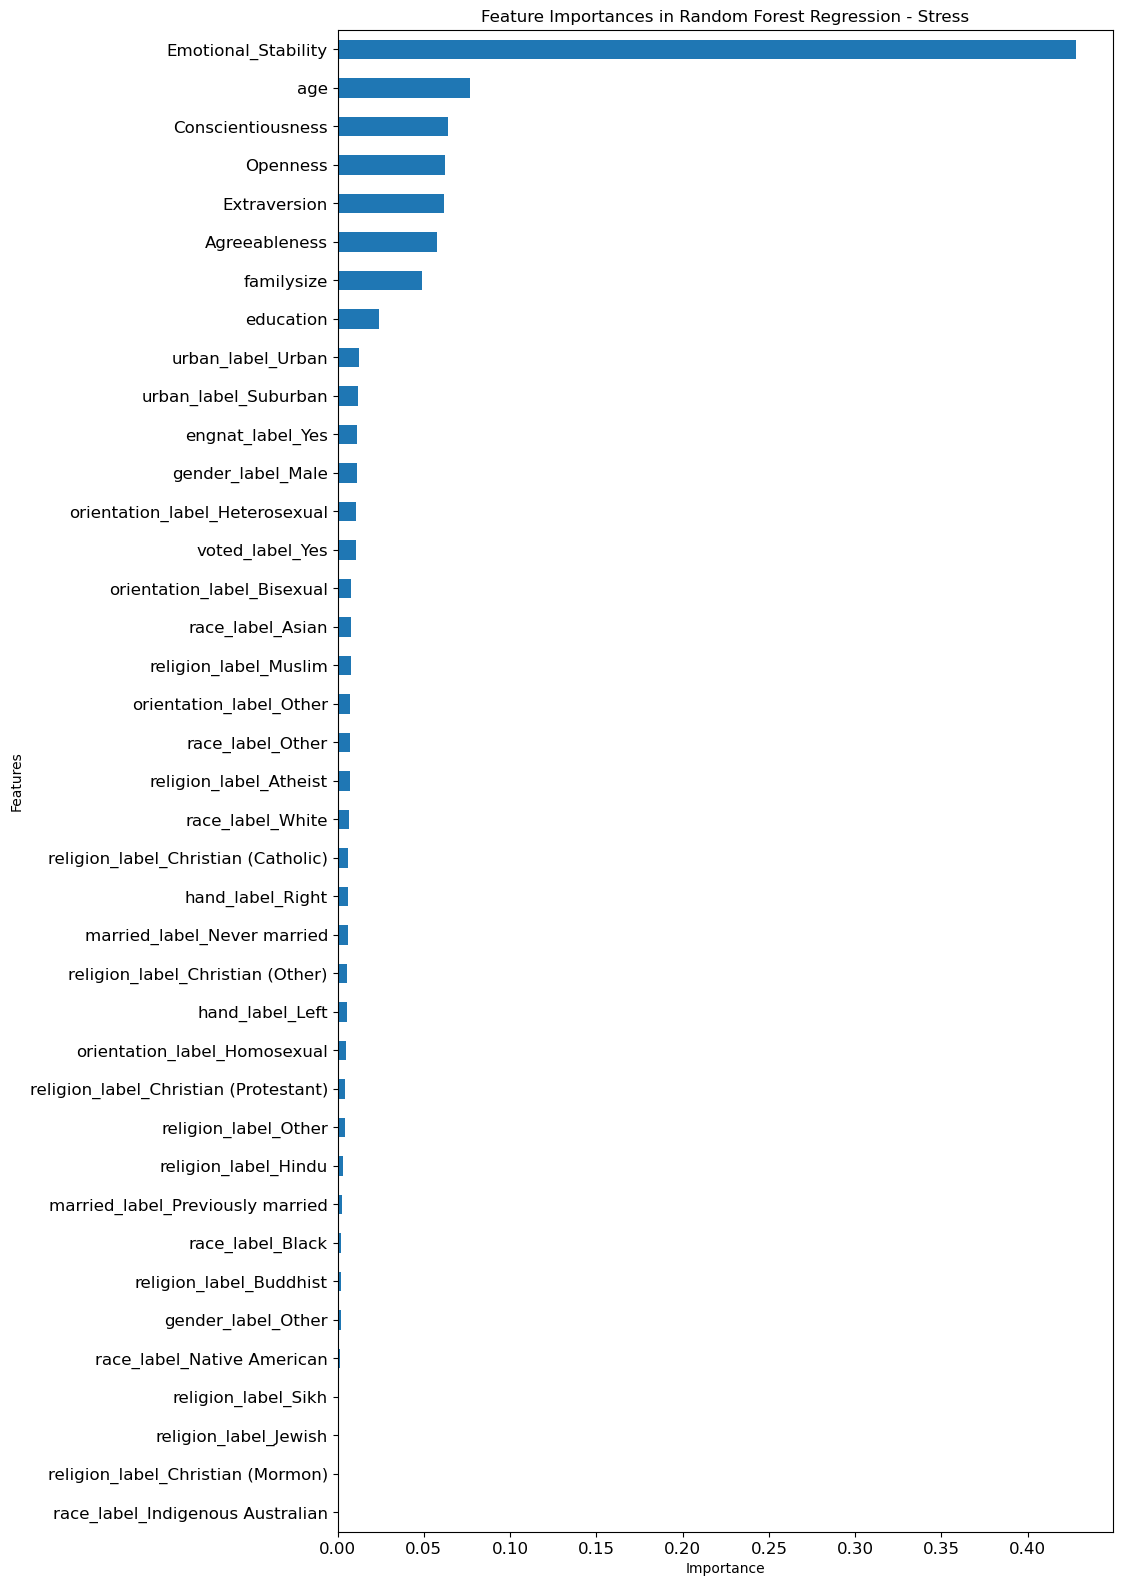

In [19]:
# Get feature importances
importances = rfr_str.feature_importances_

# Convert the importances into a pandas Series with feature names as the index
features = pd.Series(importances, index=X.columns)

# Sort the feature importances in descending order
sorted_features = features.sort_values(ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, len(sorted_features) / 2))  # Adjust the figure size as needed
sorted_features.plot(kind='barh', fontsize=12)
plt.title('Feature Importances in Random Forest Regression - Stress')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


### 3. XGB Regression

#### a) predicting depression scores

In [20]:
# Define the model
xg_reg_dep = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100, random_state=42)

# Train the model
xg_reg_dep.fit(X_train_dep, y_train_dep)

# Predict the target on the test set
y_pred_dep = xg_reg_dep.predict(X_test_dep)

# Calculate the evaluation metrics
mse_dep = mean_squared_error(y_test_dep, y_pred_dep)
r2_dep = r2_score(y_test_dep, y_pred_dep)

print(f"Depression Score - XGBoost Regression - Mean Squared Error (MSE): {mse_dep}")
print(f"Depression Score - XGBoost Regression - R-squared (R2): {r2_dep}")

Depression Score - XGBoost Regression - Mean Squared Error (MSE): 96.42058266287047
Depression Score - XGBoost Regression - R-squared (R2): 0.3550998141734184


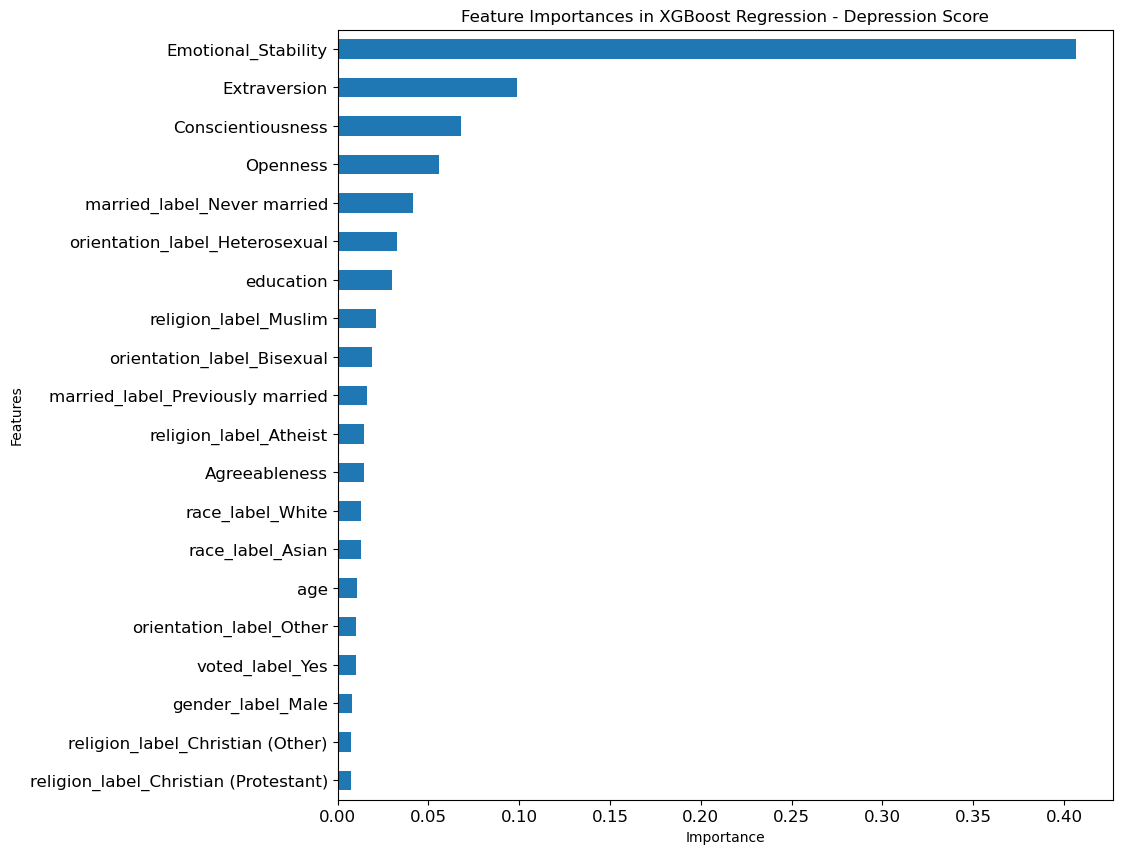

In [21]:
# Get feature importances
importances = xg_reg_dep.feature_importances_

# Convert the importances into a pandas Series with feature names as the index
features = pd.Series(importances, index=X.columns)

# Sort the feature importances in descending order
top_n = 20 #use when necessary to display fewer features
sorted_features = features.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, top_n / 2))  # Adjust the figure size as needed
sorted_features[:top_n].plot(kind='barh', fontsize=12)
plt.gca().invert_yaxis() 
plt.title('Feature Importances in XGBoost Regression - Depression Score')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### b) predicting anxiety scores

In [22]:
# Define the model
xg_reg_anx = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100, random_state=42)

# Train the model
xg_reg_anx.fit(X_train_anx, y_train_anx)

# Predict the target on the test set
y_pred_anx = xg_reg_anx.predict(X_test_anx)

# Calculate the evaluation metrics
mse_anx = mean_squared_error(y_test_anx, y_pred_anx)
r2_anx = r2_score(y_test_anx, y_pred_anx)

print(f"Anxiety Score - XGBoost Regression - Mean Squared Error (MSE): {mse_anx}")
print(f"Anxiety Score - XGBoost Regression - R-squared (R2): {r2_anx}")

Anxiety Score - XGBoost Regression - Mean Squared Error (MSE): 65.91376375753556
Anxiety Score - XGBoost Regression - R-squared (R2): 0.3467103985109121


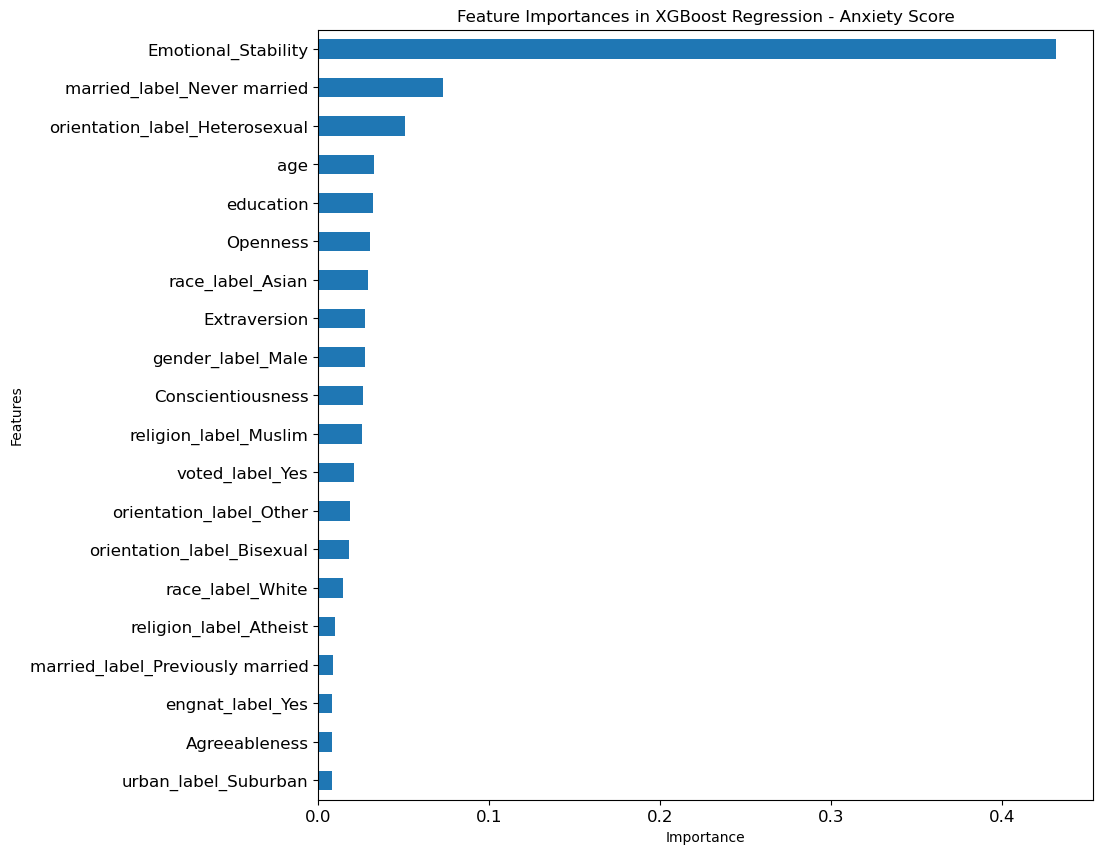

In [23]:
# Get feature importances
importances = xg_reg_anx.feature_importances_

# Convert the importances into a pandas Series with feature names as the index
features = pd.Series(importances, index=X.columns)

# Sort the feature importances in descending order
top_n = 20 #use when necessary to display fewer features
sorted_features = features.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, top_n / 2))  # Adjust the figure size as needed
sorted_features[:top_n].plot(kind='barh', fontsize=12)
plt.gca().invert_yaxis() 
plt.title('Feature Importances in XGBoost Regression - Anxiety Score')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### c) predicting stress scores

In [24]:
# Define the model
xg_reg_str = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100, random_state=42)

# Train the model
xg_reg_str.fit(X_train_str, y_train_str)

# Predict the target on the test set
y_pred_str = xg_reg_str.predict(X_test_str)

# Calculate the evaluation metrics
mse_str = mean_squared_error(y_test_str, y_pred_str)
r2_str = r2_score(y_test_str, y_pred_str)

print(f"Stress Score - XGBoost Regression - Mean Squared Error (MSE): {mse_str}")
print(f"Stress Score - XGBoost Regression - R-squared (R2): {r2_str}")

Stress Score - XGBoost Regression - Mean Squared Error (MSE): 58.87038861365511
Stress Score - XGBoost Regression - R-squared (R2): 0.44738076741229194


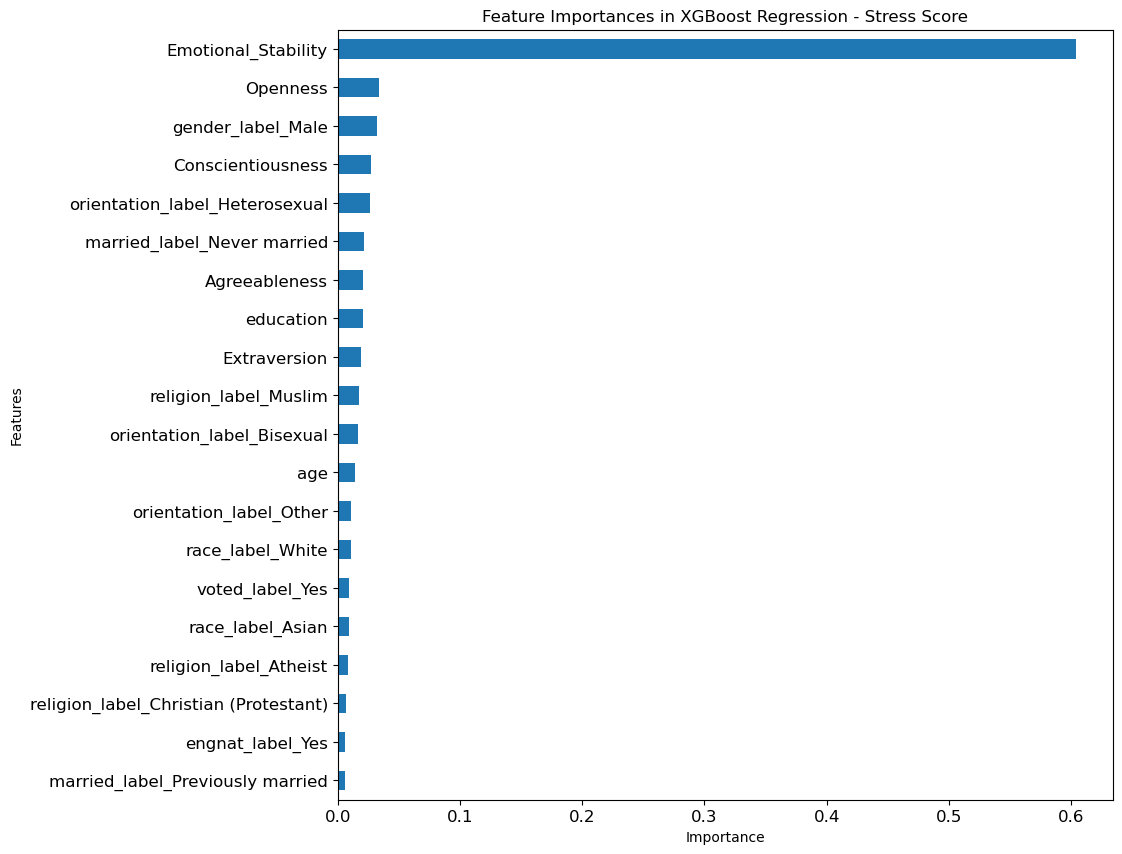

In [25]:
# Get feature importances
importances = xg_reg_str.feature_importances_

# Convert the importances into a pandas Series with feature names as the index
features = pd.Series(importances, index=X.columns)

# Sort the feature importances in descending order
top_n = 20 #use when necessary to display fewer features
sorted_features = features.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, top_n / 2))  # Adjust the figure size as needed
sorted_features[:top_n].plot(kind='barh', fontsize=12)
plt.gca().invert_yaxis() 
plt.title('Feature Importances in XGBoost Regression - Stress Score')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Results summarized:

| Model           | Target Variable | Mean Squared Error (MSE) | R-squared (R²) | Top Contributing Features                                     |
|-----------------|-----------------|--------------------------|----------------|---------------------------------------------------------------|
| Ridge Regression| Depression      | 97.148                   | 0.350          | Emotional stability (TIPI9), Previously married, Religion Buddhist |
|                 | Anxiety         | 66.079                   | 0.345          | Race Indigenous Australian, Emotional stability (TIPI4), Left handed |
|                 | Stress          | 58.213                   | 0.454          | Emotional stability (TIPI4, TIPI9), Religion Christian (Mormon) |
| Random Forest   | Depression      | 97.393                   | 0.349          | Emotional stability (TIPI9, TIPI4), Age                        |
|                 | Anxiety         | 64.551                   | 0.360          | Emotional stability (TIPI4, TIPI9), Age                        |
|                 | Stress          | 56.588                   | 0.469          | Emotional stability (TIPI9, TIPI4), TIPI1                      |
| XGBoost         | Depression      | 93.011                   | 0.377          | Emotional stability, Extraversion, Conscientiousness           |
|                 | Anxiety         | 62.235                   | 0.383          | Emotional stability (TIPI4, TIPI9), Never married              |
|                 | Stress          | 53.984                   | 0.493          | Emotional stability (TIPI4, TIPI9), TIPI2                      |


## Supplementary:

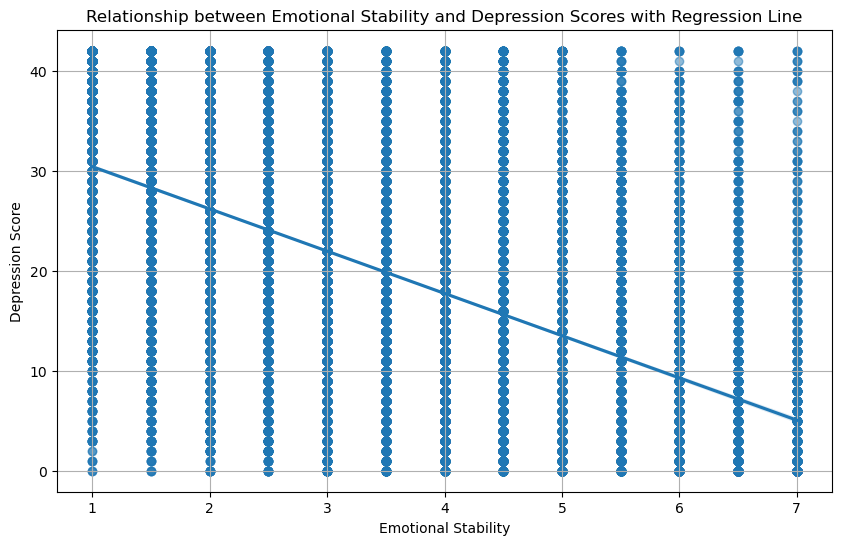

In [26]:
# Checking to see if the relationship between emotional stability and depression is in the expected direction
plt.figure(figsize=(10, 6))
sns.regplot(x='Emotional_Stability', y='Depression_Score', data=data, scatter_kws={'alpha':0.5})
plt.title('Relationship between Emotional Stability and Depression Scores with Regression Line')
plt.xlabel('Emotional Stability')
plt.ylabel('Depression Score')
plt.grid(True)
plt.show()

[00:08:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[00:08:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[00:08:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[00:08:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-au

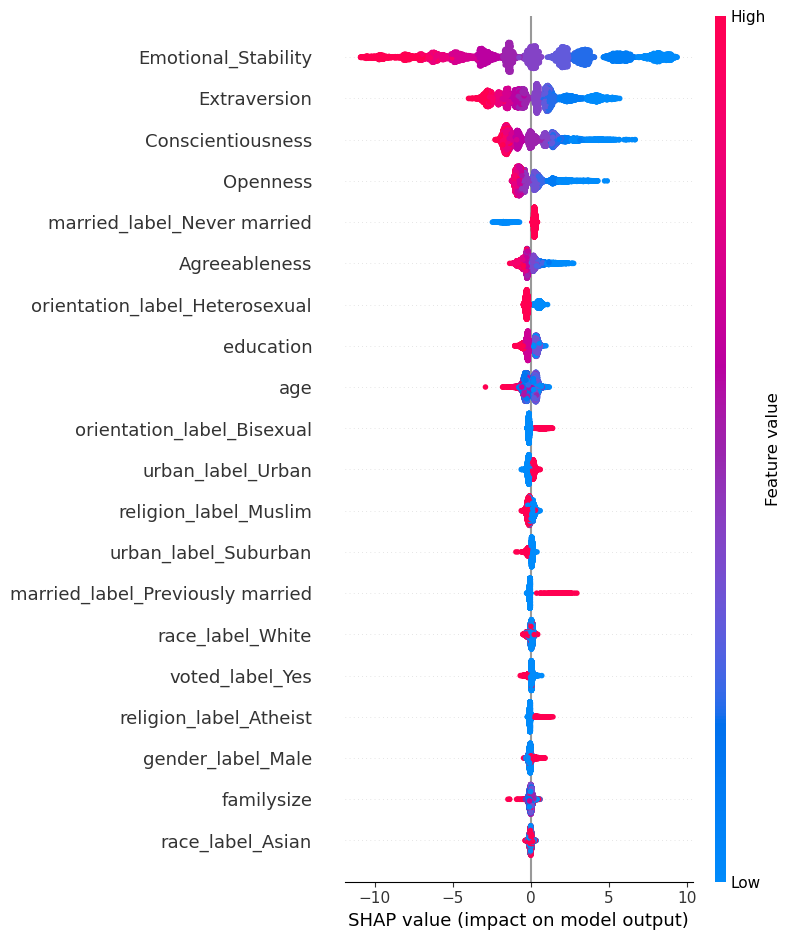

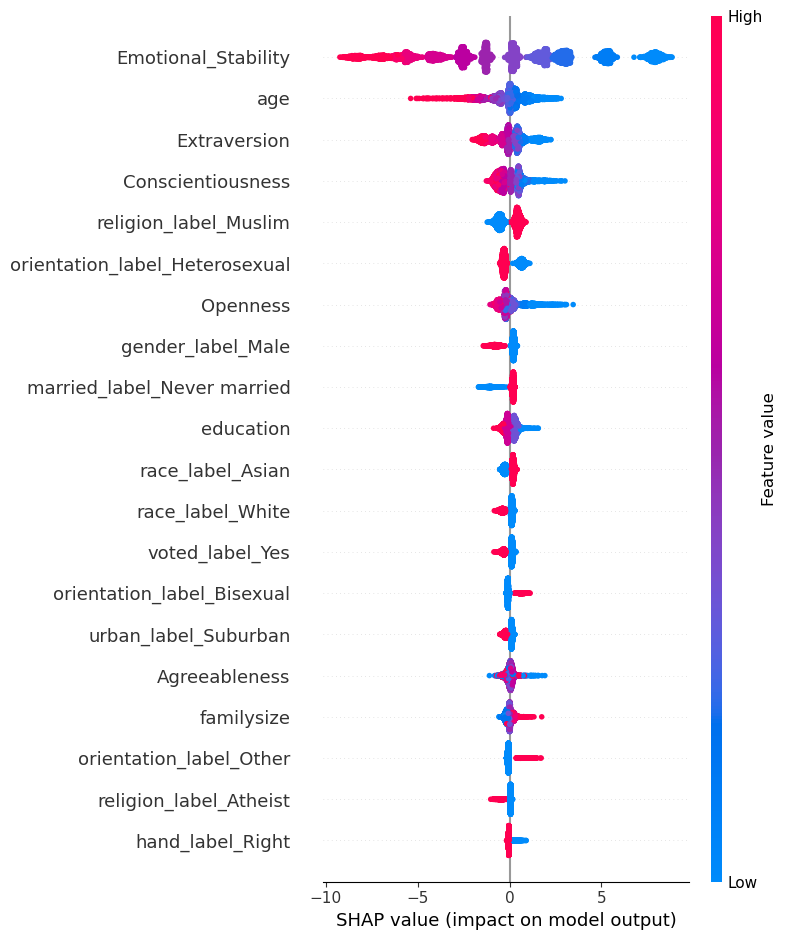

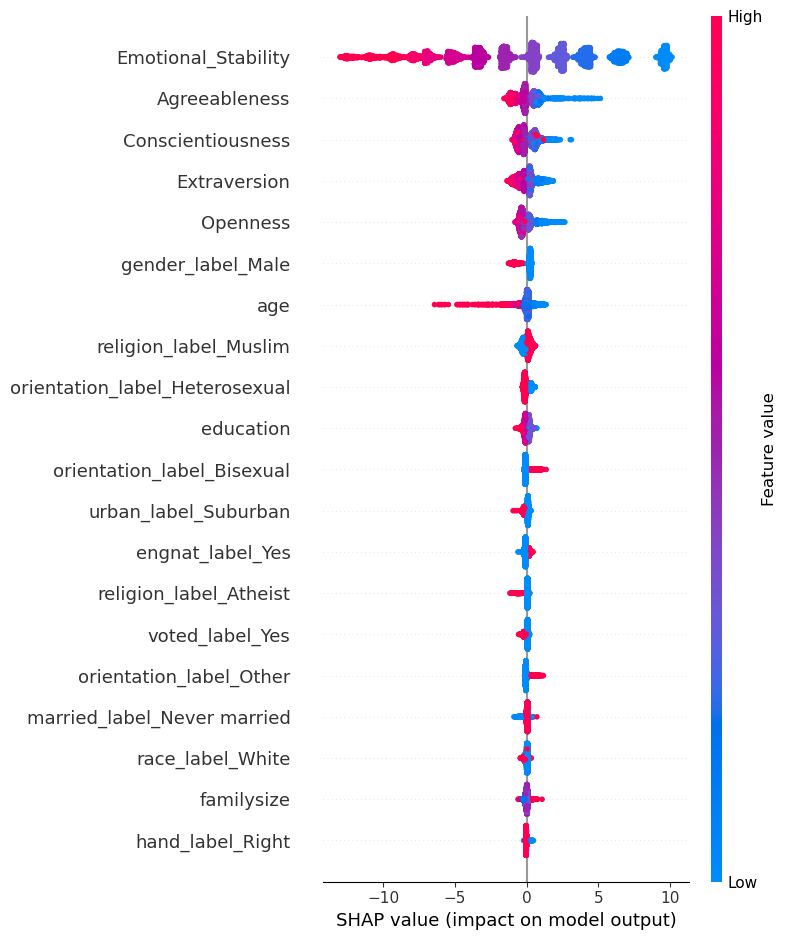

In [27]:
# Trying to visualize some more details about feature relationships
import shap

# Create a Tree explainer and SHAP values
# Depression
explainer = shap.Explainer(xg_reg_dep)
shap_values_d = explainer.shap_values(X_test_dep)
# Anxiety
explainer = shap.Explainer(xg_reg_anx)
shap_values_a = explainer.shap_values(X_test_anx)
# Stress
explainer = shap.Explainer(xg_reg_str)
shap_values_s = explainer.shap_values(X_test_str)


# Summary plot
shap.summary_plot(shap_values_d, X_test_dep)
shap.summary_plot(shap_values_a, X_test_anx)
shap.summary_plot(shap_values_s, X_test_str)

#shap.dependence_plot("TIPI4", shap_values, X_test_dep)

Results summarized for models with personality dimensions (not items):

| Model           | Target Variable | Mean Squared Error (MSE) | R-squared (R²) | Top Contributing Features                                    |
|-----------------|-----------------|--------------------------|----------------|--------------------------------------------------------------|
| Ridge Regression| Depression      | 97.273                   | 0.349          | Emotional stability, Previously married, Religion Buddhist   |
|                 | Anxiety         | 67.281                   | 0.333          | Emotional stability, Race Indigenous Australian, Left handed |
|                 | Stress          | 60.022                   | 0.437          | Emotional stability, Religion Christian (Mormon), Right handed |
| Random Forest   | Depression      | 101.216                  | 0.323          | Emotional stability, age, Extraversion                       |
|                 | Anxiety         | 69.102                   | 0.315          | Emotional stability, age, Conscientiousness                  |
|                 | Stress          | 62.481                   | 0.413          | Emotional stability, age, Conscientiousness                  |
| XGBoost         | Depression      | 96.421                   | 0.355          | Emotional stability, Extraversion, Conscientiousness         |
|                 | Anxiety         | 65.914                   | 0.347          | Emotional stability, Never married, Orientation Heterosexual |
|                 | Stress          | 58.87                    | 0.447          | Emotional stability, Openness, Gender Male                   |
